#### Comparison between SST averages over different regions and the AMV timeseries

The SST data is compared with the AMV. Different regions are selected based on the correlation between SST and the wind influence along the Dutch coast


The region whereof the AMV is taken is 0°N to 60°N and 80°W to 0°E


In [1]:
# Import necessary packages

import regionmask
import xarray as xr
import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.tsa.tsatools


from shapely.geometry import Polygon


In [2]:
# Import the detrended and smoothed AMV data
amv_31 = pd.read_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_31', index_col = 'time')
amv_51 = pd.read_csv('/Users/iriskeizer/Documents/Wind effect/Data/observations/AMV/amv_dt_sm_51', index_col = 'time')


In [3]:
# Import raw SST data 
hadisst = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/hadisst_processed.nc')
cobesst = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/cobesst_processed.nc')


In [4]:
# Import regression results
results_hadisst_31 = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/regression results/results_hadisst_31.nc')
results_cobesst_31 = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/regression results/results_cobesst_31.nc')
results_hadisst_51 = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/regression results/results_hadisst_51.nc')
results_cobesst_51 = xr.open_dataset('/Users/iriskeizer/Documents/Wind effect/Data/observations/SST/regression results/results_cobesst_51.nc')


#### Plot the maps of the correlation coefficients

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

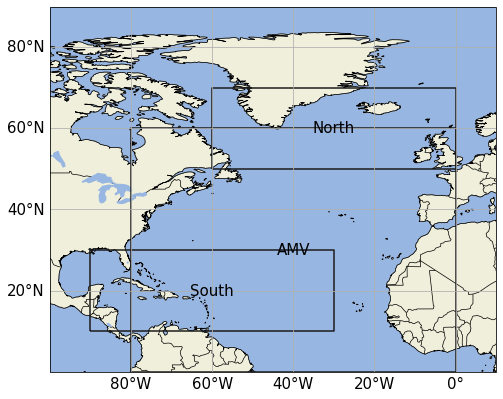

In [5]:
def regions():
    """
    Function to obtain the different regions 
    
    """
    
    # Declare regions using coordinates
    # As first coordinates take most South-West point and than go anti-clockwise
    amv = np.array([[-80, 0], [-80, 60], [0, 60], [0, 0]])
    north = np.array([[-60, 50], [-60, 70], [0, 70], [0, 50]])
    south = np.array([[-90, 10], [-90, 30], [-30, 30], [-30, 10]])
    
    
    # Declare names, abbreviations and numbers
    region_names = ["AMV", "North", "South"]
    region_numbers = [1,2,3]
    
    
    # Create regions 
    regions = regionmask.Regions([amv, north, south], 
                                           numbers = region_numbers, 
                                           names=region_names, name="Different SST regions")
    
    return regions


fig = plt.figure(figsize=(8,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100, 10, 0, 90], ccrs.PlateCarree())

text_kws = dict(bbox=dict(color="none"), fontsize=15)

ax = regions().plot(add_ocean=True, resolution="50m", proj=ccrs.Robinson(), label='name', text_kws=text_kws)

ax.add_feature(cf.BORDERS, linewidth=.7)
ax.add_feature(cf.LAND)
ax.add_feature(cf.LAKES)
ax.coastlines(resolution='50m', linewidth=.7)
gl = ax.gridlines(draw_labels = True)
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}
gl.top_labels = False
gl.right_labels = False
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)




/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


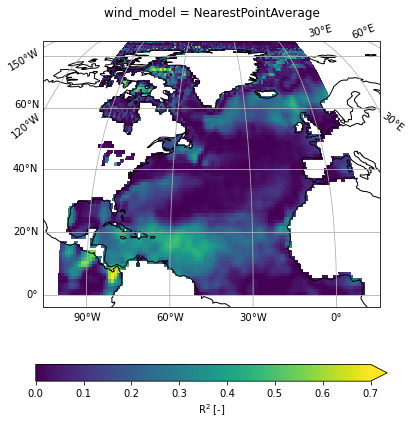

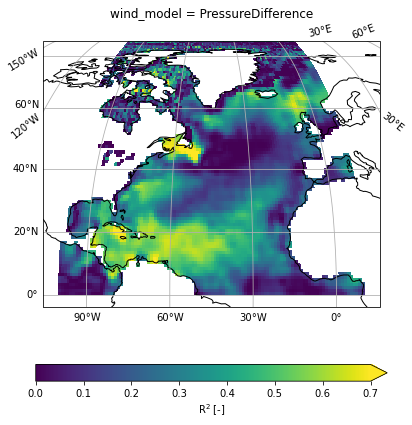

In [6]:
wind_models = ['NearestPointAverage', 'PressureDifference']

plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_31.r2.sel(wind_model = wind_models[0]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})







#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/NP_hadisst_r2', bbox_inches='tight', dpi = 500)


plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_31.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})
#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/PD_hadisst_r2', bbox_inches='tight', dpi = 500)



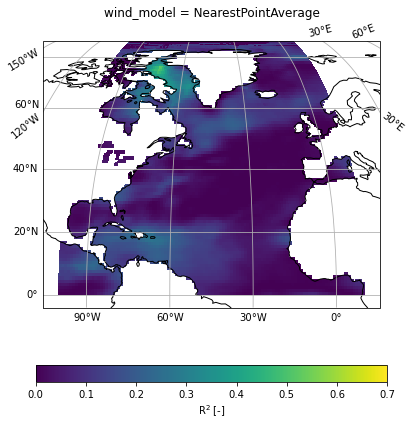

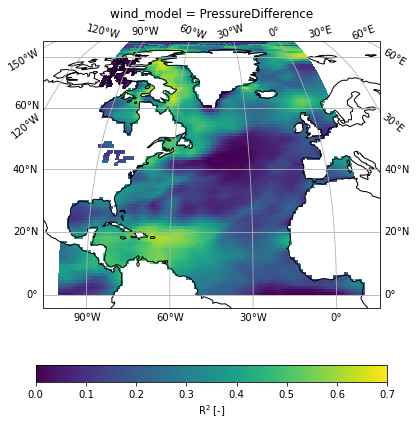

In [7]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
results_cobesst_31.r2.sel(wind_model = wind_models[0]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})
gl.xlabels_top = False
gl.ylabels_right = False
#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/NP_hadisst_r2', bbox_inches='tight', dpi = 500)


plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
ax.gridlines(draw_labels = True)
results_cobesst_31.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

gl.xlabels_top = False
gl.ylabels_right = False
#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/PD_hadisst_r2', bbox_inches='tight', dpi = 500)




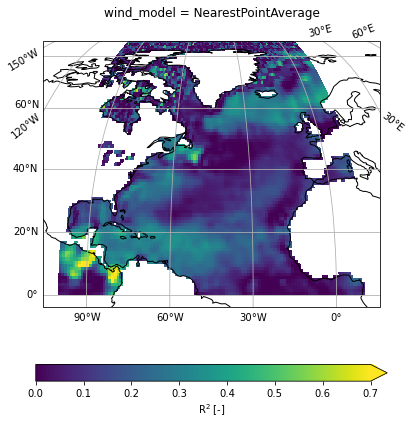

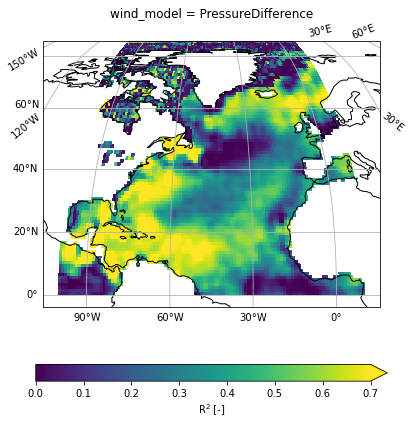

In [8]:
wind_models = ['NearestPointAverage', 'PressureDifference']

plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[0]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/NP_hadisst_r2', bbox_inches='tight', dpi = 500)


plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})
#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/PD_hadisst_r2', bbox_inches='tight', dpi = 500)



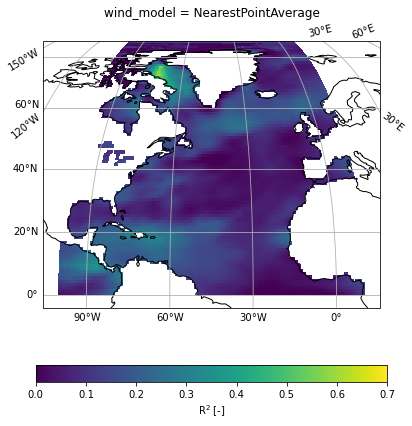

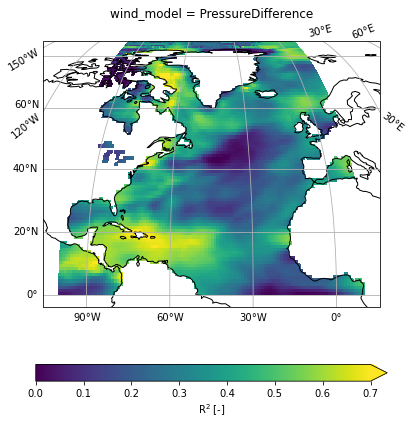

In [9]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[0]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/NP_hadisst_r2', bbox_inches='tight', dpi = 500)


plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})
#plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/SST/PD_hadisst_r2', bbox_inches='tight', dpi = 500)




## Average SST over AMV region

<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

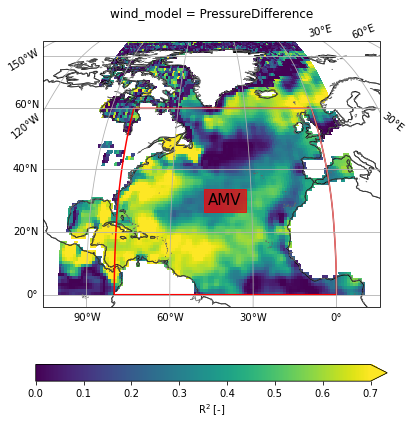

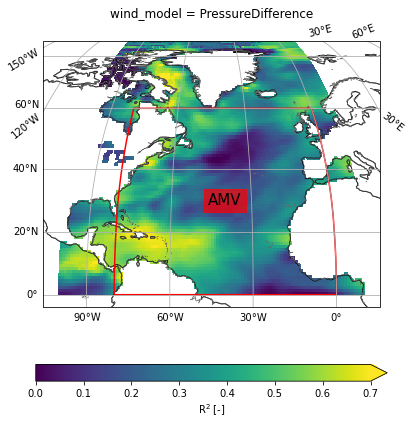

In [10]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-80, 0], [-80, 60], [0, 60], [0, 0]])], 
                                           names=["AMV"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-80, 0], [-80, 60], [0, 60], [0, 0]])], 
                                           names=["AMV"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)




In [11]:
# Take average over region 0°N to 60°N and 80°W to 0°E

hadisst_amv = hadisst.where((hadisst.lat < 60 ) & (hadisst.lon > -80) & (hadisst.lon < 0), drop = True).mean(dim = ['lat', 'lon'])
cobesst_amv = cobesst.where((cobesst.lat < 60 ) & (cobesst.lon > -80) & (cobesst.lon < 0), drop = True).mean(dim = ['lat', 'lon'])


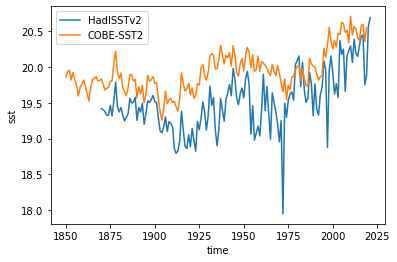

In [12]:
hadisst_amv.sst.plot()
cobesst_amv.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [13]:
# Detrend and smooth the SST over this region
hadisst_amv_dt = statsmodels.tsa.tsatools.detrend(hadisst_amv.sst, order=3, axis = 0)
cobesst_amv_dt = statsmodels.tsa.tsatools.detrend(cobesst_amv.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window

def da_smooth(da, window):
    '''
    Function to smooth a dataarray
    
    '''
    lowess = sm.nonparametric.lowess
    
    years = da.time.values
    frac = frac = window / da.time.size
    
    def lowess_1d(data):
        return lowess(data, years, frac, return_sorted = False)
    
    
    da_low = xr.apply_ufunc(lowess_1d, da, input_core_dims = [['time']], output_core_dims = [['time']], vectorize = True)
    
    return da_low

hadisst_amv_dt_sm_31 = da_smooth(hadisst_amv_dt, 31)
cobesst_amv_dt_sm_31 = da_smooth(cobesst_amv_dt, 31)
hadisst_amv_dt_sm_51 = da_smooth(hadisst_amv_dt, 51)
cobesst_amv_dt_sm_51 = da_smooth(cobesst_amv_dt, 51)


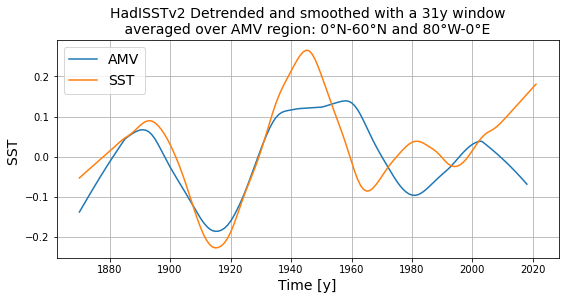

In [14]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_amv_dt_sm_31.time, hadisst_amv_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('HadISSTv2 Detrended and smoothed with a 31y window\n averaged over AMV region: 0°N-60°N and 80°W-0°E ', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()


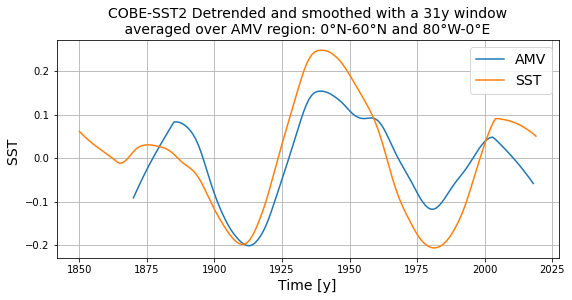

In [15]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_amv_dt_sm_31.time, cobesst_amv_dt_sm_31, label = 'SST')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 31y window\n averaged over AMV region: 0°N-60°N and 80°W-0°E ', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()



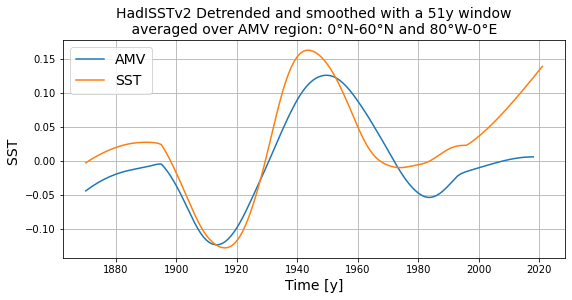

In [16]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('HadISSTv2 Detrended and smoothed with a 51y window\n averaged over AMV region: 0°N-60°N and 80°W-0°E ', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()


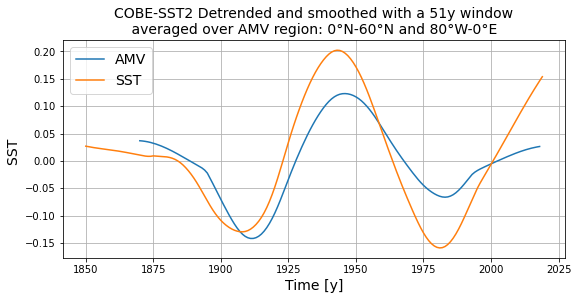

In [17]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 51y window\n averaged over AMV region: 0°N-60°N and 80°W-0°E ', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()



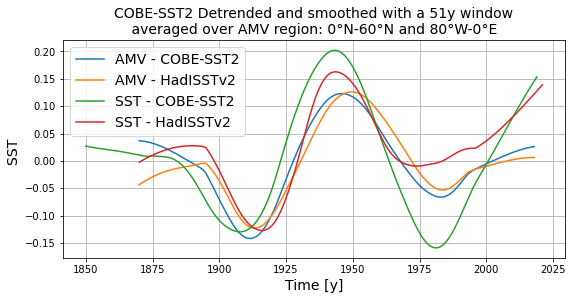

In [18]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST - COBE-SST2')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST - HadISSTv2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 51y window\n averaged over AMV region: 0°N-60°N and 80°W-0°E ', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()




#### There already seems to be some kind of lag, where the SST is in front of AMV for the COBE data. For HadISST it is less clear

#### Average SST over Northern region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

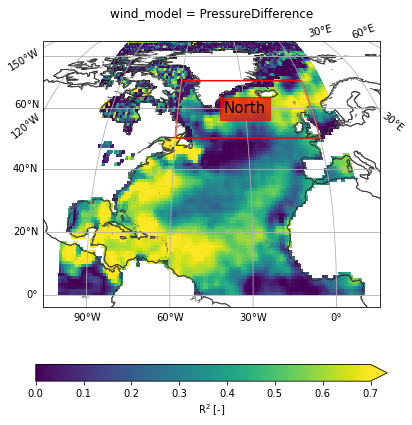

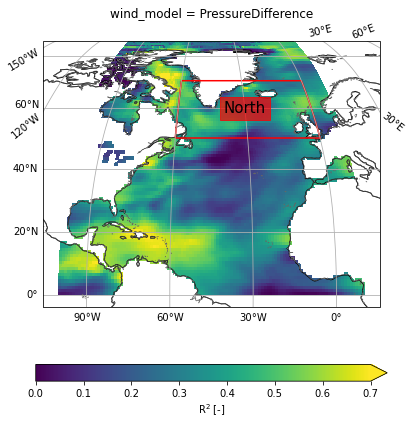

In [19]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-60, 50], [-60, 70], [0, 70], [0, 50]])], 
                                           names=["North"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-60, 50], [-60, 70], [0, 70], [0, 50]])], 
                                           names=["North"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [20]:
# Take average over region 

hadisst_north = hadisst.where((hadisst.lat > 50 ) & (hadisst.lat < 70 ) & (hadisst.lon > -60) & (hadisst.lon < 0), drop = True).mean(dim = ['lat', 'lon'])
cobesst_north = cobesst.where((cobesst.lat > 50 ) & (cobesst.lat < 70 ) & (cobesst.lon > -60) & (cobesst.lon < 0), drop = True).mean(dim = ['lat', 'lon'])


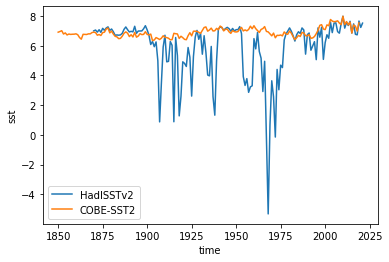

In [21]:
hadisst_north.sst.plot()
cobesst_north.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [22]:
# Detrend and smooth the SST over this region
hadisst_north_dt = statsmodels.tsa.tsatools.detrend(hadisst_north.sst, order=3, axis = 0)
cobesst_north_dt = statsmodels.tsa.tsatools.detrend(cobesst_north.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window


hadisst_north_dt_sm_31 = da_smooth(hadisst_north_dt, 31)
cobesst_north_dt_sm_31 = da_smooth(cobesst_north_dt, 31)
hadisst_north_dt_sm_51 = da_smooth(hadisst_north_dt, 51)
cobesst_north_dt_sm_51 = da_smooth(cobesst_north_dt, 51)


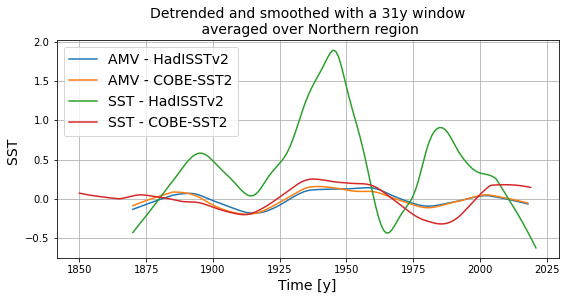

In [23]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_north_dt_sm_31.time, hadisst_north_dt_sm_31, label = 'SST - HadISSTv2')
plt.plot(cobesst_north_dt_sm_31.time, cobesst_north_dt_sm_31, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('Detrended and smoothed with a 31y window\n averaged over Northern region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()




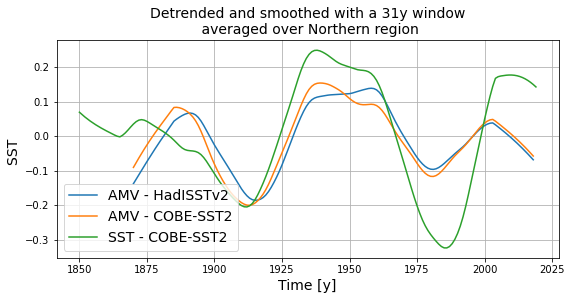

In [24]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV - COBE-SST2')
#plt.plot(hadisst_north_dt_sm_31.time, hadisst_north_dt_sm_31, label = 'SST - HadISSTv2')
plt.plot(cobesst_north_dt_sm_31.time, cobesst_north_dt_sm_31, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('Detrended and smoothed with a 31y window\n averaged over Northern region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()




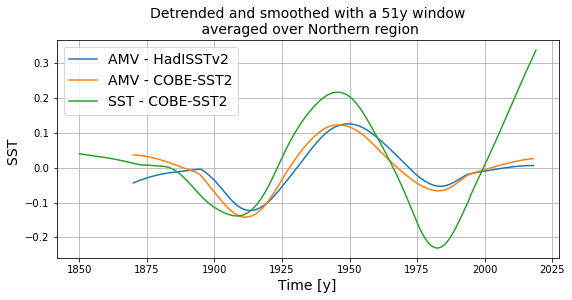

In [25]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV - COBE-SST2')
#plt.plot(hadisst_north_dt_sm_51.time, hadisst_north_dt_sm_51, label = 'SST - HadISSTv2')
plt.plot(cobesst_north_dt_sm_51.time, cobesst_north_dt_sm_51, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('Detrended and smoothed with a 51y window\n averaged over Northern region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()



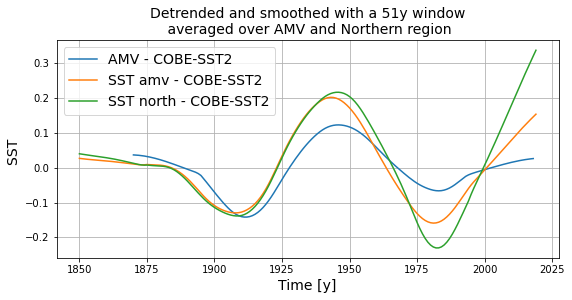

In [26]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST amv - COBE-SST2')
plt.plot(cobesst_north_dt_sm_51.time, cobesst_north_dt_sm_51, label = 'SST north - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('Detrended and smoothed with a 51y window\n averaged over AMV and Northern region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()





#### The HadISST values are weird and there is no more apparent lag between northern region and amv region for cobe

## Average SST over larger Northern region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

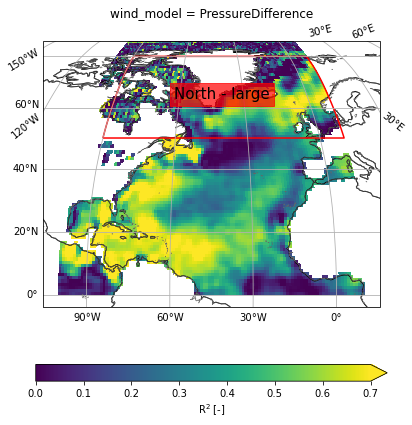

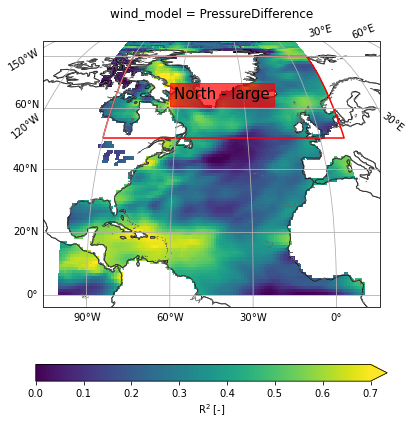

In [27]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-90, 50], [-90, 80], [10, 80], [10, 50]])], 
                                           names=["North - large"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-90, 50], [-90, 80], [10, 80], [10, 50]])], 
                                           names=["North - large"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [28]:
# Take average over region 

hadisst_north_l = hadisst.where((hadisst.lat > 50 ) & (hadisst.lat < 80 ) & (hadisst.lon > -90) & (hadisst.lon < 10), drop = True).mean(dim = ['lat', 'lon'])
cobesst_north_l = cobesst.where((cobesst.lat > 50 ) & (cobesst.lat < 80 ) & (cobesst.lon > -90) & (cobesst.lon < 10), drop = True).mean(dim = ['lat', 'lon'])


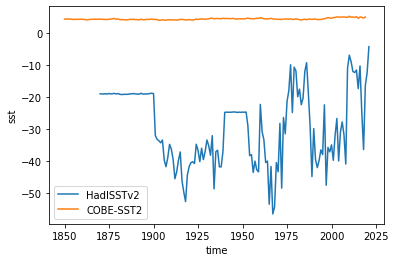

In [29]:
hadisst_north_l.sst.plot()
cobesst_north_l.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [30]:
# Detrend and smooth the SST over this region
hadisst_north_l_dt = statsmodels.tsa.tsatools.detrend(hadisst_north_l.sst, order=3, axis = 0)
cobesst_north_l_dt = statsmodels.tsa.tsatools.detrend(cobesst_north_l.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window


hadisst_north_l_dt_sm_31 = da_smooth(hadisst_north_l_dt, 31)
cobesst_north_l_dt_sm_31 = da_smooth(cobesst_north_l_dt, 31)
hadisst_north_l_dt_sm_51 = da_smooth(hadisst_north_l_dt, 51)
cobesst_north_l_dt_sm_51 = da_smooth(cobesst_north_l_dt, 51)


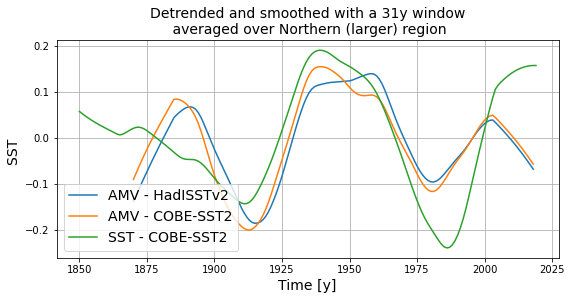

In [31]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV - COBE-SST2')
#plt.plot(hadisst_north_l_dt_sm_31.time, hadisst_north_l_dt_sm_31, label = 'SST - HadISSTv2')
plt.plot(cobesst_north_l_dt_sm_31.time, cobesst_north_l_dt_sm_31, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('Detrended and smoothed with a 31y window\n averaged over Northern (larger) region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()







#### The HadISST values are still weird

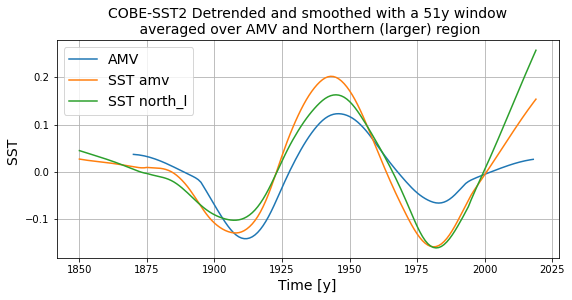

In [32]:
# Create plot to compare AMV and SST 

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST amv')
plt.plot(cobesst_north_l_dt_sm_51.time, cobesst_north_l_dt_sm_51, label = 'SST north_l')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 51y window\n averaged over AMV and Northern (larger) region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()

#### There is indeed no stronger lag between sst over the amv region and northern region compared to the AMV product from André.
We find regions where there is a strong correlation between SST and wind influence without a lag. We also find there is a correlation where AMV is shifted 5-10 years compared to the wind influence. Now we see the AMV product from André lags behind the SST data. ??

## Average SST over smaller Northern region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

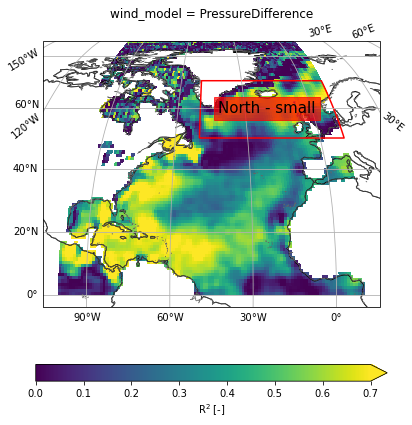

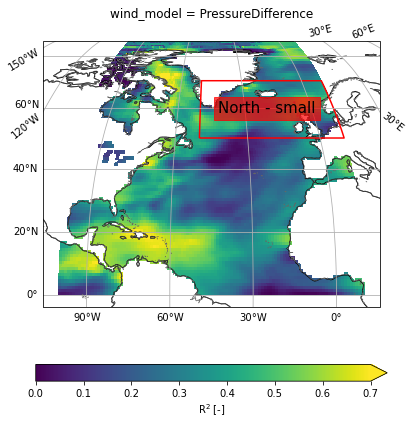

In [33]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-50, 50], [-50, 70], [10, 70], [10, 50]])], 
                                           names=["North - small"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-50, 50], [-50, 70], [10, 70], [10, 50]])], 
                                           names=["North - small"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [34]:
# Take average over region 

hadisst_north_s = hadisst.where((hadisst.lat > 50 ) & (hadisst.lat < 70 ) & (hadisst.lon > -50) & (hadisst.lon < 10), drop = True).mean(dim = ['lat', 'lon'])
cobesst_north_s = cobesst.where((cobesst.lat > 50 ) & (cobesst.lat < 70 ) & (cobesst.lon > -50) & (cobesst.lon < 10), drop = True).mean(dim = ['lat', 'lon'])


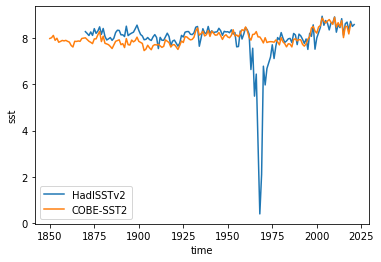

In [35]:
hadisst_north_s.sst.plot()
cobesst_north_s.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [36]:
# Detrend and smooth the SST over this region
hadisst_north_s_dt = statsmodels.tsa.tsatools.detrend(hadisst_north_s.sst, order=3, axis = 0)
cobesst_north_s_dt = statsmodels.tsa.tsatools.detrend(cobesst_north_s.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window


hadisst_north_s_dt_sm_31 = da_smooth(hadisst_north_s_dt, 31)
cobesst_north_s_dt_sm_31 = da_smooth(cobesst_north_s_dt, 31)
hadisst_north_s_dt_sm_51 = da_smooth(hadisst_north_s_dt, 51)
cobesst_north_s_dt_sm_51 = da_smooth(cobesst_north_s_dt, 51)


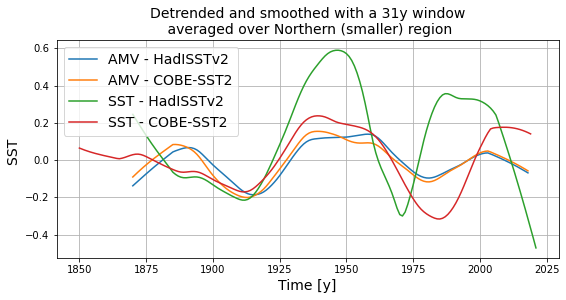

In [37]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_north_s_dt_sm_31.time, hadisst_north_s_dt_sm_31, label = 'SST - HadISSTv2')
plt.plot(cobesst_north_s_dt_sm_31.time, cobesst_north_s_dt_sm_31, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('Detrended and smoothed with a 31y window\n averaged over Northern (smaller) region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()








HadISST data over this smaller region is alread less weird

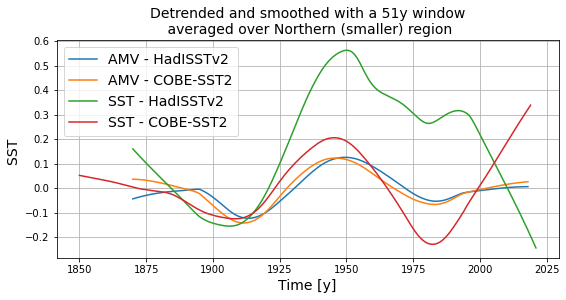

In [38]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_north_s_dt_sm_51.time, hadisst_north_s_dt_sm_51, label = 'SST - HadISSTv2')
plt.plot(cobesst_north_s_dt_sm_51.time, cobesst_north_s_dt_sm_51, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('Detrended and smoothed with a 51y window\n averaged over Northern (smaller) region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()







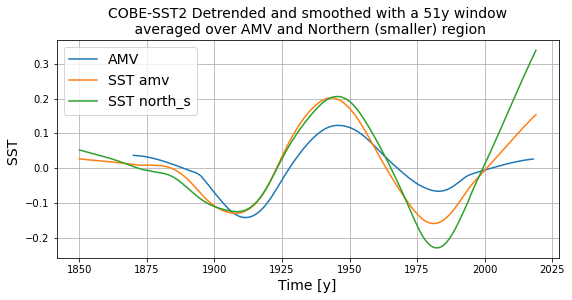

In [39]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST amv')
plt.plot(cobesst_north_s_dt_sm_51.time, cobesst_north_s_dt_sm_51, label = 'SST north_s')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 51y window\n averaged over AMV and Northern (smaller) region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()




## Average SST over Southern region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

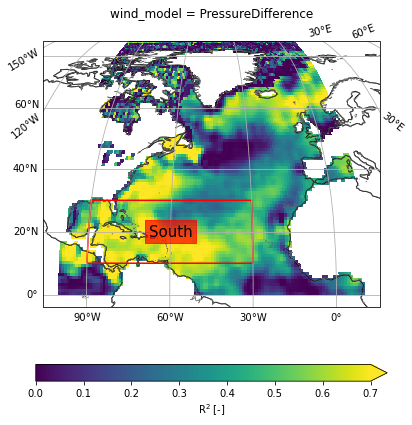

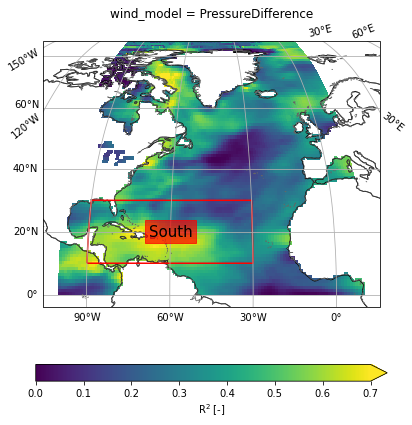

In [40]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-90, 10], [-90, 30], [-30, 30], [-30, 10]])], 
                                           names=["South"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-90, 10], [-90, 30], [-30, 30], [-30, 10]])], 
                                           names=["South"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [41]:
# Take average over region 

hadisst_south = hadisst.where((hadisst.lat > 10 ) & (hadisst.lat < 30 ) & (hadisst.lon > -90) & (hadisst.lon < -30), drop = True).mean(dim = ['lat', 'lon'])
cobesst_south = cobesst.where((cobesst.lat > 10 ) & (cobesst.lat < 30 ) & (cobesst.lon > -90) & (cobesst.lon < -30), drop = True).mean(dim = ['lat', 'lon'])


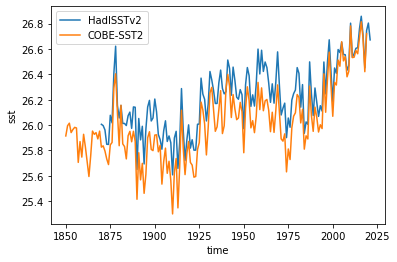

In [42]:
hadisst_south.sst.plot()
cobesst_south.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [43]:
# Detrend and smooth the SST over this region
hadisst_south_dt = statsmodels.tsa.tsatools.detrend(hadisst_south.sst, order=3, axis = 0)
cobesst_south_dt = statsmodels.tsa.tsatools.detrend(cobesst_south.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window


hadisst_south_dt_sm_31 = da_smooth(hadisst_south_dt, 31)
cobesst_south_dt_sm_31 = da_smooth(cobesst_south_dt, 31)
hadisst_south_dt_sm_51 = da_smooth(hadisst_south_dt, 51)
cobesst_south_dt_sm_51 = da_smooth(cobesst_south_dt, 51)


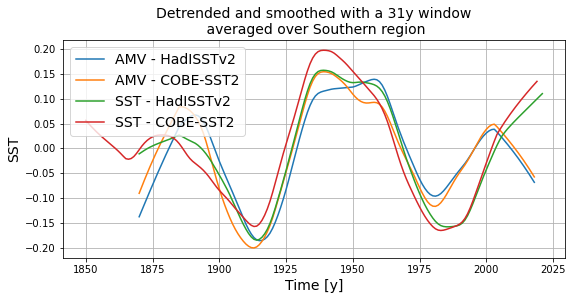

In [44]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_south_dt_sm_31.time, hadisst_south_dt_sm_31, label = 'SST - HadISSTv2')
plt.plot(cobesst_south_dt_sm_31.time, cobesst_south_dt_sm_31, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('Detrended and smoothed with a 31y window\n averaged over Southern region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()


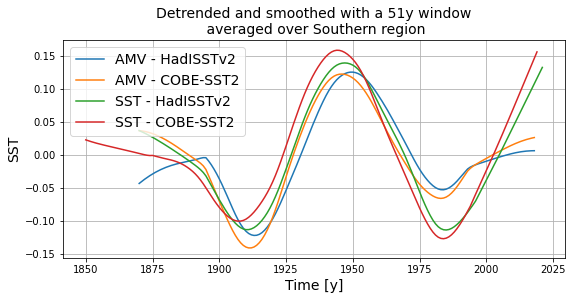

In [45]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_south_dt_sm_51.time, hadisst_south_dt_sm_51, label = 'SST - HadISSTv2')
plt.plot(cobesst_south_dt_sm_51.time, cobesst_south_dt_sm_51, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('Detrended and smoothed with a 51y window\n averaged over Southern region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()



#### HadISST data for south is not weird 

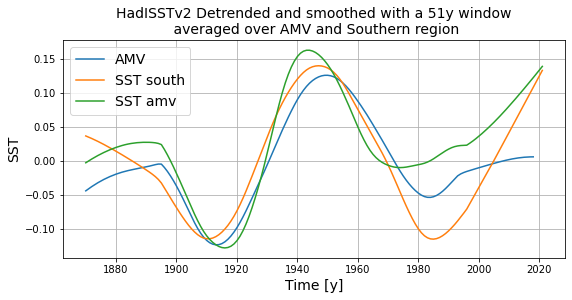

In [46]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_south_dt_sm_51.time, hadisst_south_dt_sm_51, label = 'SST south')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('HadISSTv2 Detrended and smoothed with a 51y window\n averaged over AMV and Southern region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()




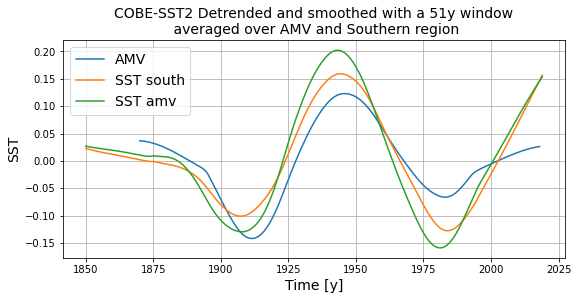

In [47]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_south_dt_sm_51.time, cobesst_south_dt_sm_51, label = 'SST south')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 51y window\n averaged over AMV and Southern region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()





### There is a lag between andrés AMV product and the SST products but not more apparent for these different regions

## Average SST over larger Southern region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

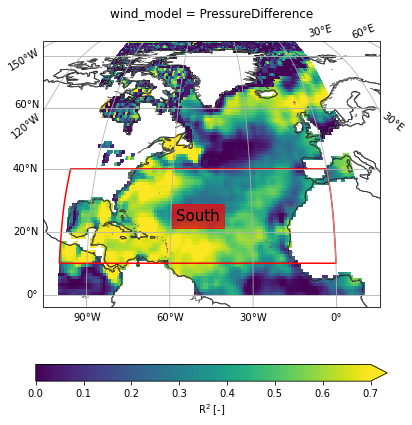

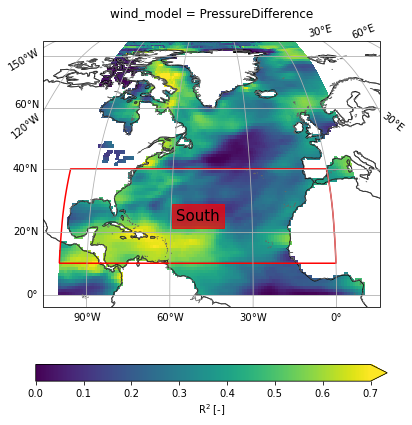

In [48]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-100, 10], [-100, 40], [0, 40], [0, 10]])], 
                                           names=["South"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-100, 10], [-100, 40], [0, 40], [0, 10]])], 
                                           names=["South"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [49]:
# Take average over region 

hadisst_south_l = hadisst.where((hadisst.lat > 10 ) & (hadisst.lat < 40 ) & (hadisst.lon > -100) & (hadisst.lon < 0), drop = True).mean(dim = ['lat', 'lon'])
cobesst_south_l = cobesst.where((cobesst.lat > 10 ) & (cobesst.lat < 40 ) & (cobesst.lon > -100) & (cobesst.lon < 0), drop = True).mean(dim = ['lat', 'lon'])


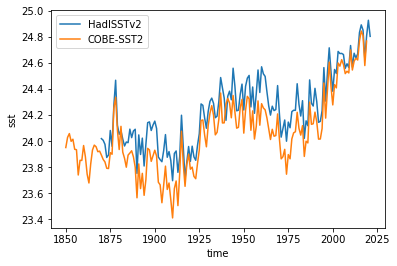

In [50]:
hadisst_south_l.sst.plot()
cobesst_south_l.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [51]:
# Detrend and smooth the SST over this region
hadisst_south_l_dt = statsmodels.tsa.tsatools.detrend(hadisst_south_l.sst, order=3, axis = 0)
cobesst_south_l_dt = statsmodels.tsa.tsatools.detrend(cobesst_south_l.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window


hadisst_south_l_dt_sm_31 = da_smooth(hadisst_south_l_dt, 31)
cobesst_south_l_dt_sm_31 = da_smooth(cobesst_south_l_dt, 31)
hadisst_south_l_dt_sm_51 = da_smooth(hadisst_south_l_dt, 51)
cobesst_south_l_dt_sm_51 = da_smooth(cobesst_south_l_dt, 51)


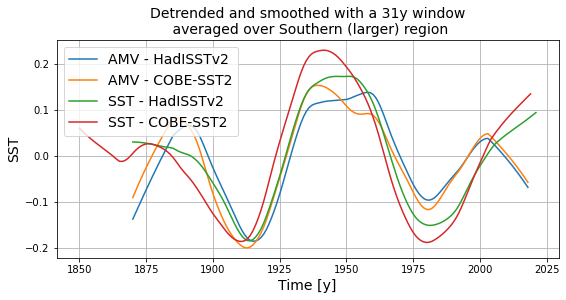

In [52]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_south_l_dt_sm_31.time, hadisst_south_l_dt_sm_31, label = 'SST - HadISSTv2')
plt.plot(cobesst_south_l_dt_sm_31.time, cobesst_south_l_dt_sm_31, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('Detrended and smoothed with a 31y window\n averaged over Southern (larger) region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()


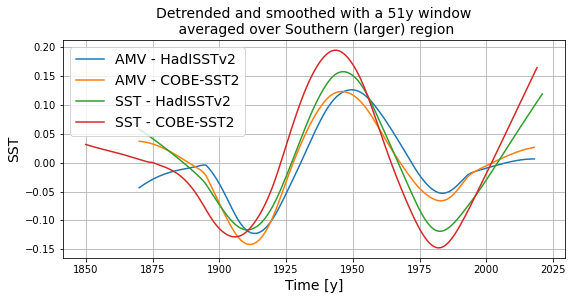

In [53]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_south_l_dt_sm_51.time, hadisst_south_l_dt_sm_51, label = 'SST - HadISSTv2')
plt.plot(cobesst_south_l_dt_sm_51.time, cobesst_south_l_dt_sm_51, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('Detrended and smoothed with a 51y window\n averaged over Southern (larger) region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()



#### HadISST data for south is not weird 

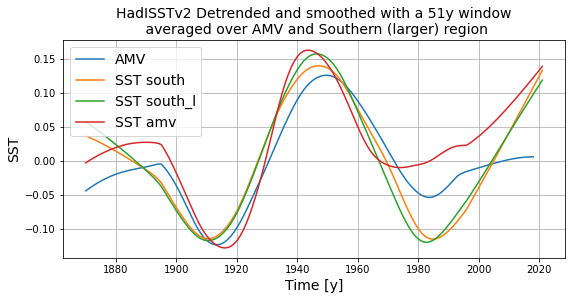

In [54]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_south_dt_sm_51.time, hadisst_south_dt_sm_51, label = 'SST south')
plt.plot(hadisst_south_l_dt_sm_51.time, hadisst_south_l_dt_sm_51, label = 'SST south_l')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('HadISSTv2 Detrended and smoothed with a 51y window\n averaged over AMV and Southern (larger) region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()




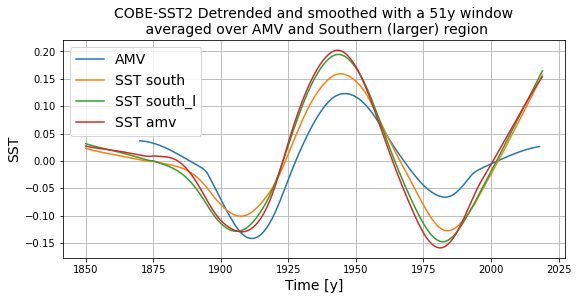

In [55]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_south_dt_sm_51.time, cobesst_south_dt_sm_51, label = 'SST south')
plt.plot(cobesst_south_l_dt_sm_51.time, cobesst_south_l_dt_sm_51, label = 'SST south_l')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 51y window\n averaged over AMV and Southern (larger) region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()





### The larger southern region is much more alike the AMV region

## Average SST over Eastern region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

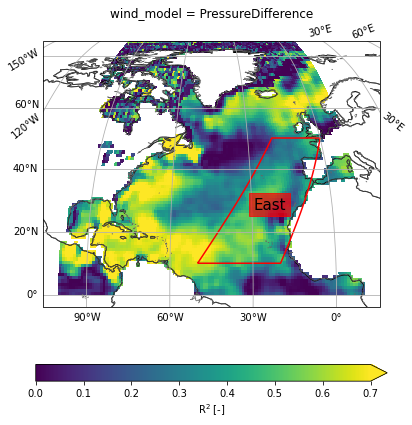

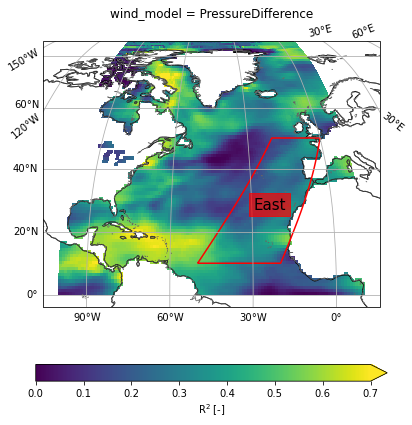

In [56]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-50, 10], [-20, 50], [0, 50], [-20, 10]])], 
                                           names=["East"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-50, 10], [-20, 50], [0, 50], [-20, 10]])], 
                                           names=["East"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [57]:
# Take average over region 

hadisst_mask = regionmask.Regions([np.array([[-50, 10], [-20, 50], [0, 50], [-20, 10]])], names=["East"], numbers = [1]).mask(hadisst)
cobesst_mask = regionmask.Regions([np.array([[-50, 10], [-20, 50], [0, 50], [-20, 10]])], names=["East"], numbers = [1]).mask(cobesst)


hadisst_east = hadisst.where(hadisst_mask == 1, drop = True).mean(dim = ['lat', 'lon'])
cobesst_east = cobesst.where(cobesst_mask == 1, drop = True).mean(dim = ['lat', 'lon'])

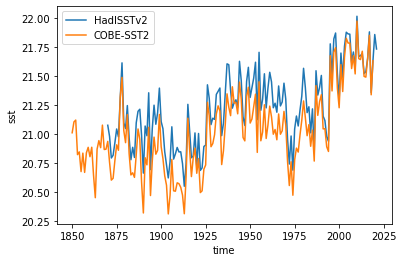

In [58]:
hadisst_east.sst.plot()
cobesst_east.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [59]:
# Detrend and smooth the SST over this region
hadisst_east_dt = statsmodels.tsa.tsatools.detrend(hadisst_east.sst, order=3, axis = 0)
cobesst_east_dt = statsmodels.tsa.tsatools.detrend(cobesst_east.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year smoothing window


hadisst_east_dt_sm_31 = da_smooth(hadisst_east_dt, 31)
cobesst_east_dt_sm_31 = da_smooth(cobesst_east_dt, 31)
hadisst_east_dt_sm_51 = da_smooth(hadisst_east_dt, 51)
cobesst_east_dt_sm_51 = da_smooth(cobesst_east_dt, 51)


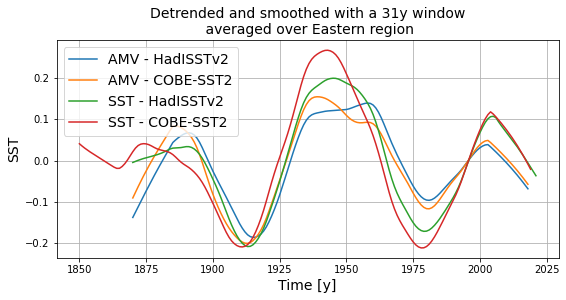

In [60]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_east_dt_sm_31.time, hadisst_east_dt_sm_31, label = 'SST - HadISSTv2')
plt.plot(cobesst_east_dt_sm_31.time, cobesst_east_dt_sm_31, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('Detrended and smoothed with a 31y window\n averaged over Eastern region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()


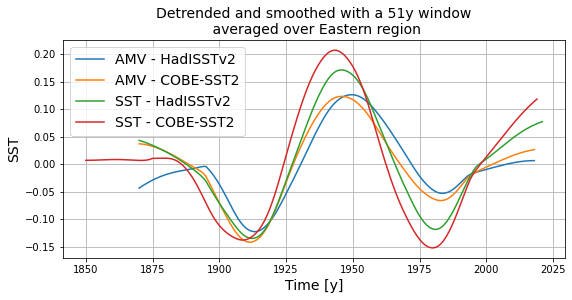

In [61]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_east_dt_sm_51.time, hadisst_east_dt_sm_51, label = 'SST - HadISSTv2')
plt.plot(cobesst_east_dt_sm_51.time, cobesst_east_dt_sm_51, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('Detrended and smoothed with a 51y window\n averaged over Eastern region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()



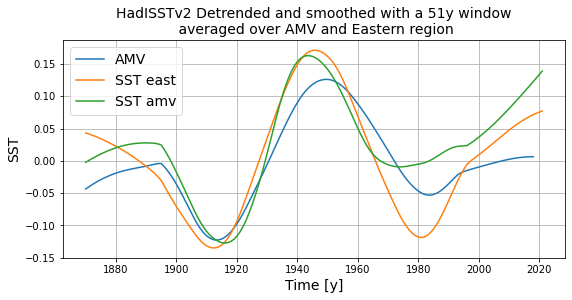

In [62]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_east_dt_sm_51.time, hadisst_east_dt_sm_51, label = 'SST east')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('HadISSTv2 Detrended and smoothed with a 51y window\n averaged over AMV and Eastern region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()




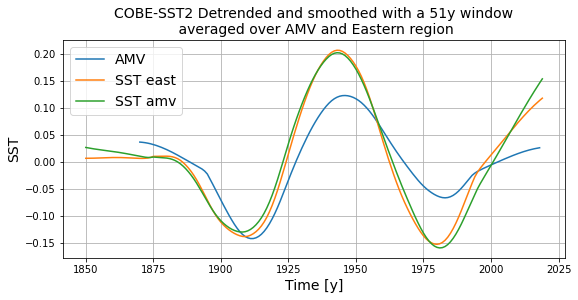

In [63]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_east_dt_sm_51.time, cobesst_east_dt_sm_51, label = 'SST east')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 51y window\n averaged over AMV and Eastern region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()





### Eastern region for COBE is close to AMV, for Hadisst not for recent decades

##### ?

## Average SST over Western region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

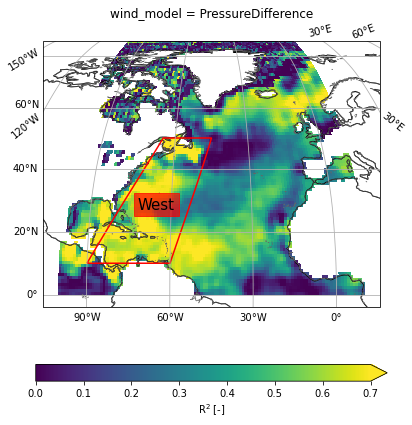

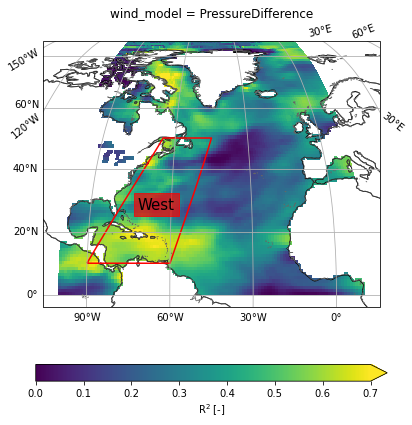

In [64]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-90, 10], [-65, 50], [-45, 50], [-60, 10]])], 
                                           names=["West"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)







plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')
regionmask.Regions([np.array([[-90, 10], [-65, 50], [-45, 50], [-60, 10]])], 
                                           names=["West"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





In [65]:
# Take average over region 

hadisst_mask = regionmask.Regions([np.array([[-90, 10], [-65, 50], [-45, 50], [-60, 10]])], names=["East"], numbers = [1]).mask(hadisst)
cobesst_mask = regionmask.Regions([np.array([[-90, 10], [-65, 50], [-45, 50], [-60, 10]])], names=["East"], numbers = [1]).mask(cobesst)


hadisst_west = hadisst.where(hadisst_mask == 1, drop = True).mean(dim = ['lat', 'lon'])
cobesst_west = cobesst.where(cobesst_mask == 1, drop = True).mean(dim = ['lat', 'lon'])

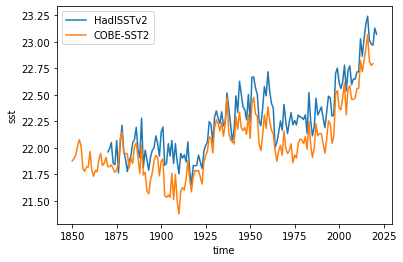

In [66]:
hadisst_west.sst.plot()
cobesst_west.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [67]:
# Detrend and smooth the SST over this region
hadisst_west_dt = statsmodels.tsa.tsatools.detrend(hadisst_west.sst, order=3, axis = 0)
cobesst_west_dt = statsmodels.tsa.tsatools.detrend(cobesst_west.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year and 51-year smoothing window


hadisst_west_dt_sm_31 = da_smooth(hadisst_west_dt, 31)
cobesst_west_dt_sm_31 = da_smooth(cobesst_west_dt, 31)
hadisst_west_dt_sm_51 = da_smooth(hadisst_west_dt, 51)
cobesst_west_dt_sm_51 = da_smooth(cobesst_west_dt, 51)


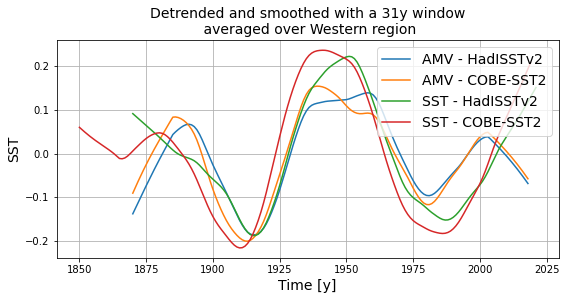

In [68]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_west_dt_sm_31.time, hadisst_west_dt_sm_31, label = 'SST - HadISSTv2')
plt.plot(cobesst_west_dt_sm_31.time, cobesst_west_dt_sm_31, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('Detrended and smoothed with a 31y window\n averaged over Western region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()


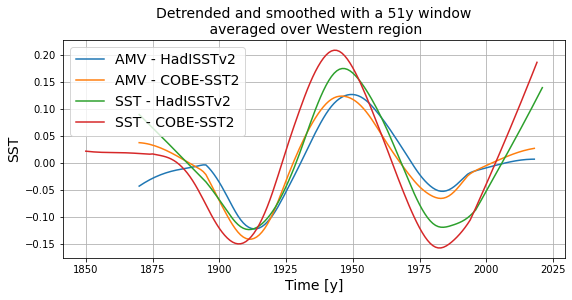

In [69]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_west_dt_sm_51.time, hadisst_west_dt_sm_51, label = 'SST - HadISSTv2')
plt.plot(cobesst_west_dt_sm_51.time, cobesst_west_dt_sm_51, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('Detrended and smoothed with a 51y window\n averaged over Western region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()



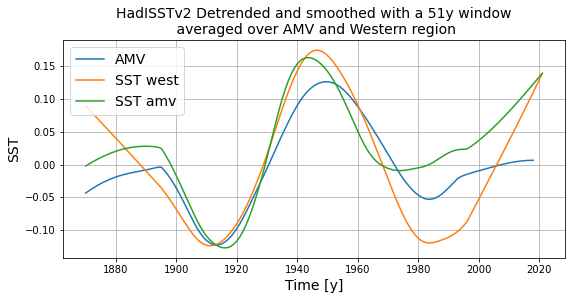

In [70]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_west_dt_sm_51.time, hadisst_west_dt_sm_51, label = 'SST west')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('HadISSTv2 Detrended and smoothed with a 51y window\n averaged over AMV and Western region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()




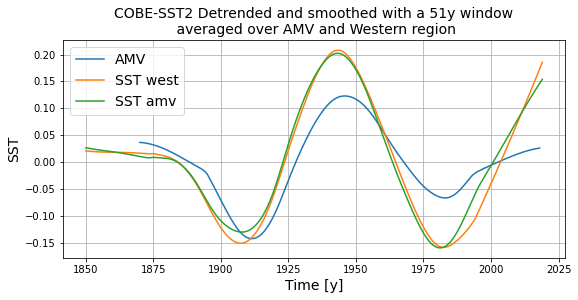

In [71]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_west_dt_sm_51.time, cobesst_west_dt_sm_51, label = 'SST west')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 51y window\n averaged over AMV and Western region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()





### There is a lag between andrés AMV product and the SST products but not more apparent for these different regions

#### Plot all results together

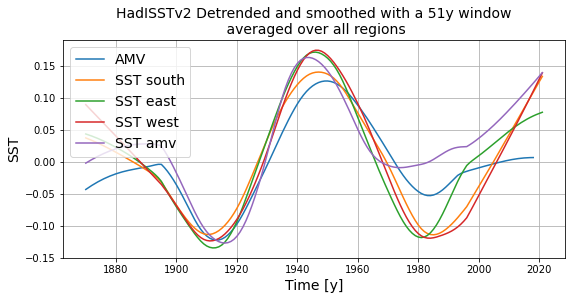

In [72]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
#plt.plot(hadisst_north_s_dt_sm_51.time, hadisst_north_s_dt_sm_51, label = 'SST north_s')
plt.plot(hadisst_south_dt_sm_51.time, hadisst_south_dt_sm_51, label = 'SST south')
plt.plot(hadisst_east_dt_sm_51.time, hadisst_east_dt_sm_51, label = 'SST east')
plt.plot(hadisst_west_dt_sm_51.time, hadisst_west_dt_sm_51, label = 'SST west')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('HadISSTv2 Detrended and smoothed with a 51y window\n averaged over all regions', fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)
plt.grid()



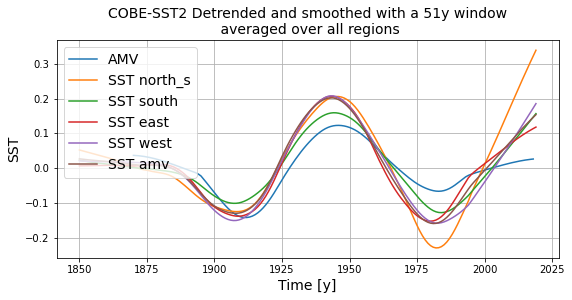

In [73]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_north_s_dt_sm_51.time, cobesst_north_s_dt_sm_51, label = 'SST north_s')
plt.plot(cobesst_south_dt_sm_51.time, cobesst_south_dt_sm_51, label = 'SST south')
plt.plot(cobesst_east_dt_sm_51.time, cobesst_east_dt_sm_51, label = 'SST east')
plt.plot(cobesst_west_dt_sm_51.time, cobesst_west_dt_sm_51, label = 'SST west')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 51y window\n averaged over all regions', fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)
plt.grid()




## Average SST over Doughnut region

/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

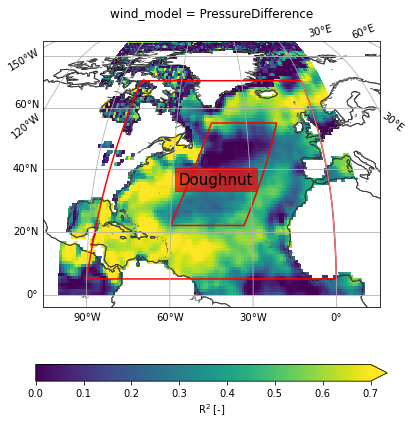

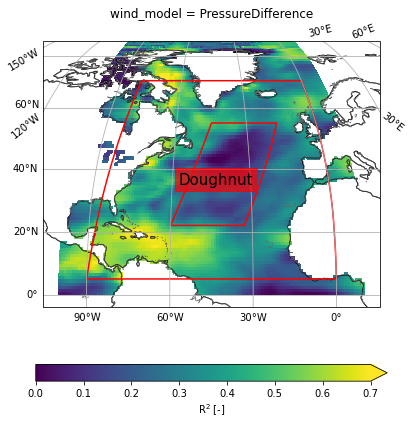

In [74]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')

doughnut_interior = np.array([[-60, 22], [-45, 55], [-17, 55], [-33, 22]])
doughnut_exterior = np.array([[-90, 5], [-80, 70], [0, 70], [0, 5]])
doughnut = Polygon(doughnut_exterior, holes = [doughnut_interior])

regionmask.Regions([doughnut], names=["Doughnut"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')


regionmask.Regions([doughnut], names=["Doughnut"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)










In [75]:
# Take average over region 

hadisst_mask = regionmask.Regions([doughnut], names=["Doughnut"], numbers = [1]).mask(hadisst)
cobesst_mask = regionmask.Regions([doughnut], names=["Doughnut"], numbers = [1]).mask(cobesst)


hadisst_doughnut = hadisst.where(hadisst_mask == 1, drop = True).mean(dim = ['lat', 'lon'])
cobesst_doughnut = cobesst.where(cobesst_mask == 1, drop = True).mean(dim = ['lat', 'lon'])

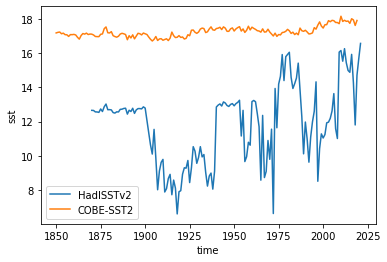

In [76]:
hadisst_doughnut.sst.plot()
cobesst_doughnut.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [77]:
# Detrend and smooth the SST over this region
hadisst_doughnut_dt = statsmodels.tsa.tsatools.detrend(hadisst_doughnut.sst, order=3, axis = 0)
cobesst_doughnut_dt = statsmodels.tsa.tsatools.detrend(cobesst_doughnut.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year and 51-year smoothing window


hadisst_doughnut_dt_sm_31 = da_smooth(hadisst_doughnut_dt, 31)
cobesst_doughnut_dt_sm_31 = da_smooth(cobesst_doughnut_dt, 31)
hadisst_doughnut_dt_sm_51 = da_smooth(hadisst_doughnut_dt, 51)
cobesst_doughnut_dt_sm_51 = da_smooth(cobesst_doughnut_dt, 51)


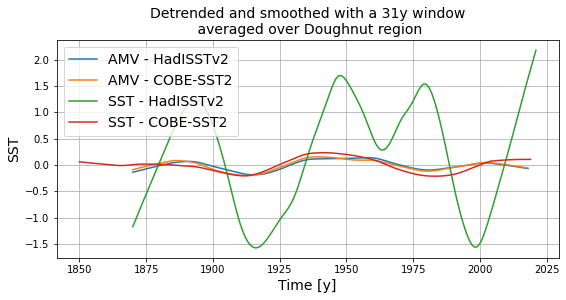

In [78]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_doughnut_dt_sm_31.time, hadisst_doughnut_dt_sm_31, label = 'SST - HadISSTv2')
plt.plot(cobesst_doughnut_dt_sm_31.time, cobesst_doughnut_dt_sm_31, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('Detrended and smoothed with a 31y window\n averaged over Doughnut region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()


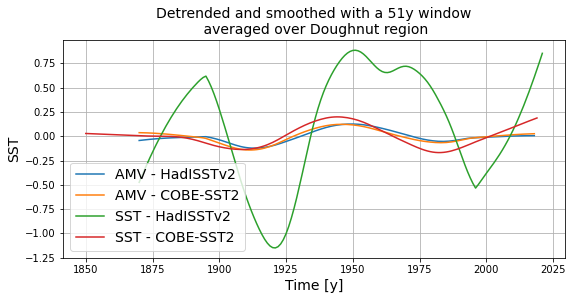

In [79]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_doughnut_dt_sm_51.time, hadisst_doughnut_dt_sm_51, label = 'SST - HadISSTv2')
plt.plot(cobesst_doughnut_dt_sm_51.time, cobesst_doughnut_dt_sm_51, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('Detrended and smoothed with a 51y window\n averaged over Doughnut region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()



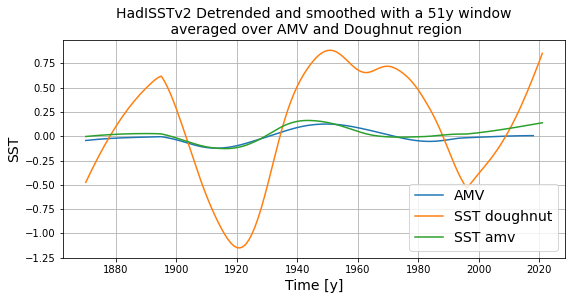

In [80]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_doughnut_dt_sm_51.time, hadisst_doughnut_dt_sm_51, label = 'SST doughnut')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('HadISSTv2 Detrended and smoothed with a 51y window\n averaged over AMV and Doughnut region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()




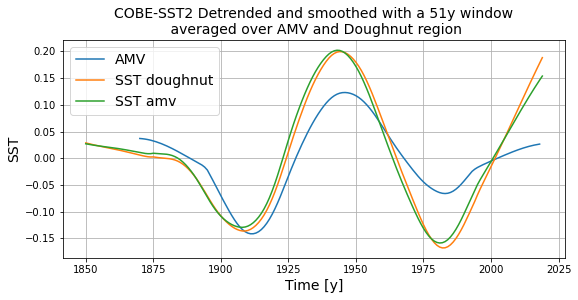

In [81]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_doughnut_dt_sm_51.time, cobesst_doughnut_dt_sm_51, label = 'SST doughnut')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 51y window\n averaged over AMV and Doughnut region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()





/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/iriskeizer/opt/anaconda3/lib/python3.9/site-packages/regionmask/core/plot.py:230: FutureWarning: 'proj' has been renamed to 'projection'
  warnings.warn("'proj' has been renamed to 'projection'", FutureWarning)


<GeoAxesSubplot:title={'center':'wind_model = PressureDifference'}, xlabel='lon', ylabel='Latitude [degrees_north]'>

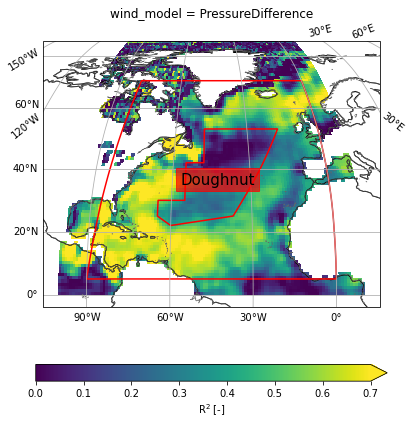

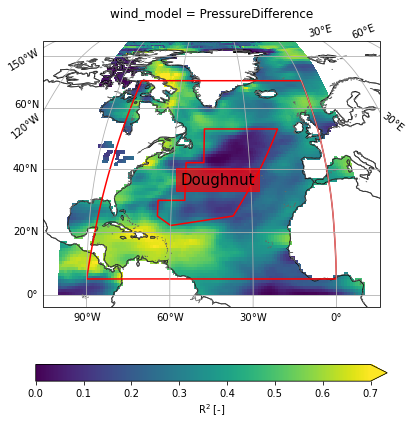

In [82]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_hadisst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')

doughnut_interior = np.array([[-60, 22], [-65, 25], [-65, 30], [-55, 30], [-55, 42], [-48, 42], [-48, 53], [-17, 53], [-26, 40], [-37, 25]])
doughnut_exterior = np.array([[-90, 5], [-80, 70], [0, 70], [0, 5]])
doughnut = Polygon(doughnut_exterior, holes = [doughnut_interior])

regionmask.Regions([doughnut], names=["Doughnut"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)





plt.figure(figsize = (7,7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-45))
ax.coastlines()
gl = ax.gridlines(draw_labels = True)
gl.xlabels_top = False
gl.ylabels_right = False
results_cobesst_51.r2.sel(wind_model = wind_models[1]).plot(ax=ax, transform=ccrs.PlateCarree(), vmin = 0.0, vmax = 0.7,
                                                        cbar_kwargs = {'orientation':'horizontal', 'shrink':0.9, 'label':'R$^2$ [-]'})

text_kws = dict(bbox=dict(color="red", alpha = 0.7), fontsize=15, color = 'k')
line_kws = dict(color = 'red')


regionmask.Regions([doughnut], names=["Doughnut"]).plot(ax = ax, 
                                                                                                  resolution="50m", 
                                                                                                  proj=ccrs.Robinson(), 
                                                                                                  label='name', 
                                                                                                  line_kws=line_kws,
                                                                                                  text_kws=text_kws)










In [83]:
# Take average over region 

hadisst_mask = regionmask.Regions([doughnut], names=["Doughnut"], numbers = [1]).mask(hadisst)
cobesst_mask = regionmask.Regions([doughnut], names=["Doughnut"], numbers = [1]).mask(cobesst)


hadisst_doughnut = hadisst.where(hadisst_mask == 1, drop = True).mean(dim = ['lat', 'lon'])
cobesst_doughnut = cobesst.where(cobesst_mask == 1, drop = True).mean(dim = ['lat', 'lon'])

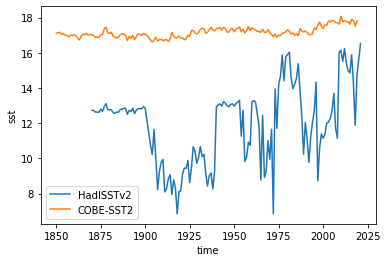

In [84]:
hadisst_doughnut.sst.plot()
cobesst_doughnut.sst.plot()
plt.legend(labels = ['HadISSTv2','COBE-SST2'])

In [85]:
# Detrend and smooth the SST over this region
hadisst_doughnut_dt = statsmodels.tsa.tsatools.detrend(hadisst_doughnut.sst, order=3, axis = 0)
cobesst_doughnut_dt = statsmodels.tsa.tsatools.detrend(cobesst_doughnut.sst, order=3, axis = 0)

# Apply a LOWESS function with a 31-year and 51-year smoothing window


hadisst_doughnut_dt_sm_31 = da_smooth(hadisst_doughnut_dt, 31)
cobesst_doughnut_dt_sm_31 = da_smooth(cobesst_doughnut_dt, 31)
hadisst_doughnut_dt_sm_51 = da_smooth(hadisst_doughnut_dt, 51)
cobesst_doughnut_dt_sm_51 = da_smooth(cobesst_doughnut_dt, 51)


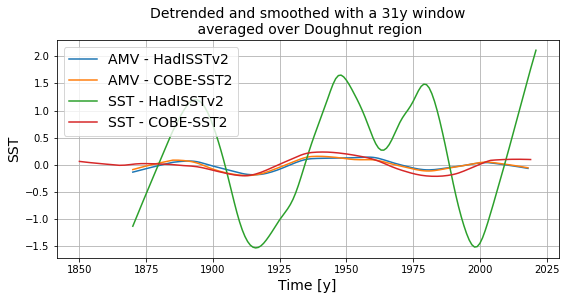

In [86]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_31.index, amv_31['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_31.index, amv_31['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_doughnut_dt_sm_31.time, hadisst_doughnut_dt_sm_31, label = 'SST - HadISSTv2')
plt.plot(cobesst_doughnut_dt_sm_31.time, cobesst_doughnut_dt_sm_31, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('Detrended and smoothed with a 31y window\n averaged over Doughnut region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()


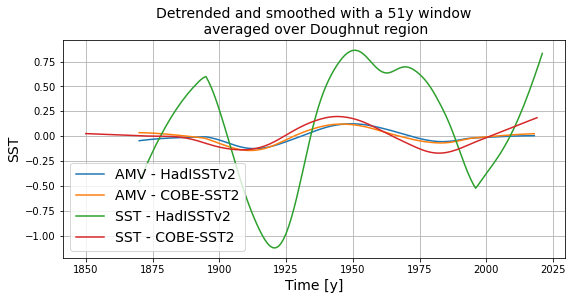

In [87]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_doughnut_dt_sm_51.time, hadisst_doughnut_dt_sm_51, label = 'SST - HadISSTv2')
plt.plot(cobesst_doughnut_dt_sm_51.time, cobesst_doughnut_dt_sm_51, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('Detrended and smoothed with a 51y window\n averaged over Doughnut region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()



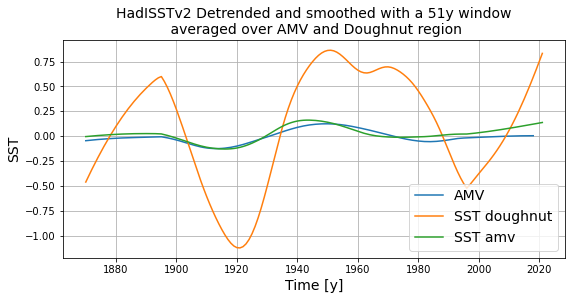

In [88]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
plt.plot(hadisst_doughnut_dt_sm_51.time, hadisst_doughnut_dt_sm_51, label = 'SST doughnut')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('HadISSTv2 Detrended and smoothed with a 51y window\n averaged over AMV and Doughnut region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()




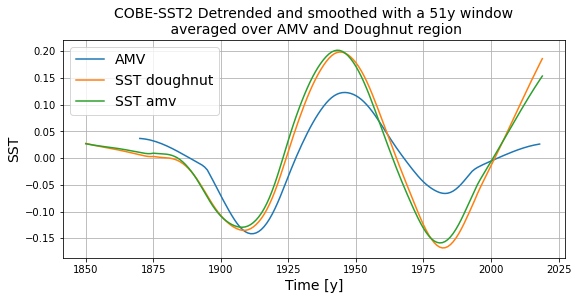

In [89]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_doughnut_dt_sm_51.time, cobesst_doughnut_dt_sm_51, label = 'SST doughnut')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 51y window\n averaged over AMV and Doughnut region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()





## Compare smoothed SST over whole region with AMV product from André

In [90]:
# Detrend and smooth the SST
hadisst_dt = statsmodels.tsa.tsatools.detrend(hadisst.sst.mean(dim = ['lat', 'lon']), order=3, axis = 0)
cobesst_dt = statsmodels.tsa.tsatools.detrend(cobesst.sst.mean(dim = ['lat', 'lon']), order=3, axis = 0)

# Apply a LOWESS function with a 31-year and 51-year smoothing window


hadisst_dt_sm_31 = da_smooth(hadisst_dt, 31)
cobesst_dt_sm_31 = da_smooth(cobesst_dt, 31)
hadisst_dt_sm_51 = da_smooth(hadisst_dt, 51)
cobesst_dt_sm_51 = da_smooth(cobesst_dt, 51)



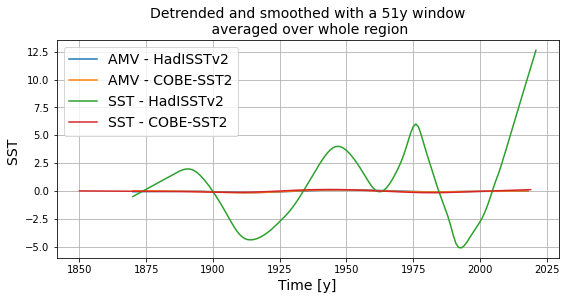

In [91]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV - COBE-SST2')
plt.plot(hadisst_dt_sm_31.time, hadisst_dt_sm_31, label = 'SST - HadISSTv2')
plt.plot(cobesst_dt_sm_51.time, cobesst_dt_sm_51, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('Detrended and smoothed with a 51y window\n averaged over whole region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()

plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV_SST_comparison/AMV_SST_full_region')


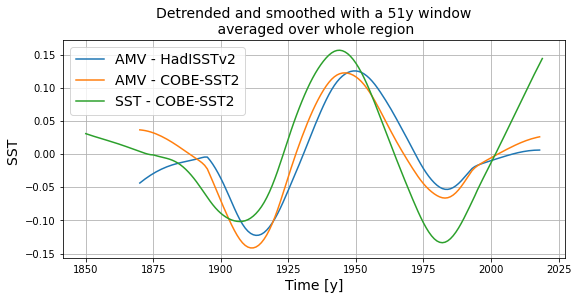

In [97]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV - HadISSTv2')
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV - COBE-SST2')
#plt.plot(hadisst_dt_sm_31.time, hadisst_dt_sm_31, label = 'SST - HadISSTv2')
plt.plot(cobesst_dt_sm_51.time, cobesst_dt_sm_51, label = 'SST - COBE-SST2')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST ', fontsize = 14)
plt.title('Detrended and smoothed with a 51y window\n averaged over whole region', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()

plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV_SST_comparison/AMV_SST_full_region_51')



### So there is a lag between SST and AMV product from André anyways 

#### Plot all results together

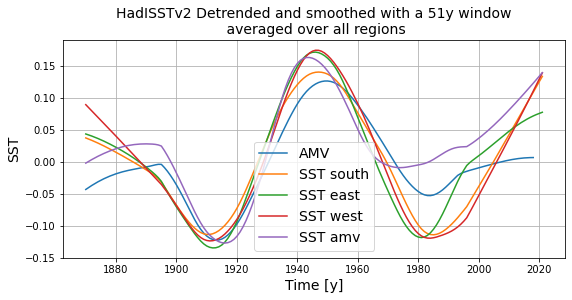

In [96]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['HadISSTv2'], label = 'AMV')
#plt.plot(hadisst_north_s_dt_sm_51.time, hadisst_north_s_dt_sm_51, label = 'SST north_s')
#plt.plot(hadisst_dt_sm_51.time, hadisst_dt_sm_51, label = 'SST full')
plt.plot(hadisst_south_dt_sm_51.time, hadisst_south_dt_sm_51, label = 'SST south')
plt.plot(hadisst_east_dt_sm_51.time, hadisst_east_dt_sm_51, label = 'SST east')
plt.plot(hadisst_west_dt_sm_51.time, hadisst_west_dt_sm_51, label = 'SST west')
plt.plot(hadisst_amv_dt_sm_51.time, hadisst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('HadISSTv2 Detrended and smoothed with a 51y window\n averaged over all regions', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()

plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV_SST_comparison/AMV_SST_all_regions_hadi_51')



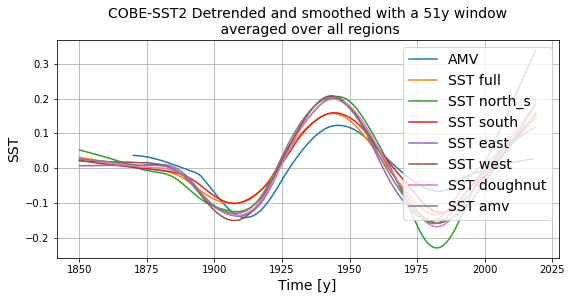

In [95]:
# Create plot to compare AMV and SST averaged over the same region

plt.figure(figsize = (9,4))
plt.plot(amv_51.index, amv_51['COBE-SST2'], label = 'AMV')
plt.plot(cobesst_dt_sm_51.time, cobesst_dt_sm_51, label = 'SST full')
plt.plot(cobesst_north_s_dt_sm_51.time, cobesst_north_s_dt_sm_51, label = 'SST north_s')
plt.plot(cobesst_south_dt_sm_51.time, cobesst_south_dt_sm_51, label = 'SST south')
plt.plot(cobesst_east_dt_sm_51.time, cobesst_east_dt_sm_51, label = 'SST east')
plt.plot(cobesst_west_dt_sm_51.time, cobesst_west_dt_sm_51, label = 'SST west')
plt.plot(cobesst_doughnut_dt_sm_51.time, cobesst_doughnut_dt_sm_51, label = 'SST doughnut')
plt.plot(cobesst_amv_dt_sm_51.time, cobesst_amv_dt_sm_51, label = 'SST amv')
plt.xlabel('Time [y]', fontsize = 14)
plt.ylabel('SST', fontsize = 14)
plt.title('COBE-SST2 Detrended and smoothed with a 51y window\n averaged over all regions', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid()

plt.savefig('/Users/iriskeizer/Documents/Wind effect/Figures/AMV_SST_comparison/AMV_SST_all_regions_cobe_51')




SST averaged over all regions lies quite close together but there is a lag with the AMV product